# Lung Cancer Prediction with Logistic Regression

## 1. Dataset Overview

More Accurate Lung Cancer Dataset - https://www.kaggle.com/datasets/chandanmsr/more-accurate-lung-cancer-dataset

**Data types**

- Classification is used to assign data points into predefined categories or classes, in this case the target variable (`LUNG_CANCER`) is dichotomous (binary and categorical), suitable for classification.  

- The independant variables include a single numerical feature, `AGE`. The rest of the independent variables are dichotomous.

- The features included in the dataset are logically related to lung cancer risk, making them potentially strong predictors for lung cancer.

**Data Quality and Common Pitfalls**

- The data was found to be generally clean and structured with no missing or inconsistently formatted values, data still needs to be checked for duplicates.

- `GENDER` is recorded as 'M' or 'F', and `LUNG_CANCER` is recorded as 'YES' or 'NO', these variables need to be binary encoded.

- The other categorical variables are recorded as 1 or 2, and should be standardised to 0 or 1 (binary) to avoid errors in the code, since many libraries expect 0 or 1 when working with categorical variables.

- One-hot encoding is not necessary for dichotomous variables.

- The dataset will be further analysed for pitfalls such as class imbalance during EDA.

---




## 2. Why Use Logistic Regression?

For this task, I chose logistic regression because it is a simple, reliable, and well-understood method for binary classification. It provides clear outputs, making it easy to understand how each feature affects the prediction, which is useful when explaining results in a report. Logistic regression also gives probability scores, helping assess the confidence of predictions.

Compared to more complex models like random forests, support vector machines, or neural networks, logistic regression is faster to train and requires fewer adjustments or fine-tuning. This makes it especially practical for an initial or proof-of-concept model where simplicity and interpretability matter.

Logistic regression also performs well when the relationships between features and the outcome are reasonably linear, as is often the case with many structured datasets. While it may not capture highly complex or nonlinear patterns, its balance of simplicity, speed, and interpretability makes it a strong and appropriate choice for this project.


## 3. Analysis Plan

#### a. Exploratory Data Analysis (EDA) Plan
| **Steps** | **Purpose** |
|-|-|
| **Load and Inspect Data** (`lcs.csv`)| Check data shape, column types, and preview unique values.|
| **Summary Statistics** (`describe()`)| Understand distributions and spot unusual values in numerical features.|
| **Data Types Check** | Identify numerical, binary, and multi-category features.|
| **Format Data** | Correctly encode variables using binary encoding.|
| **Check for Duplicates and Missing Values**| Clean data by removing incomplete records.|
| **Visual Inspection** | Explore class imbalance, distributions of numeric and categorical features, and trends.|
| **Class Balance Check** | Understand imbalance in the target variable `LUNG_CANCER` field |

#### b. Feature Selection Plan
| **Steps** | **Reason** |
|-|-|
| **Use p-value backward elimination with statsmodels.api logit regression** | Remove features that do not significantly contribute to predicting lung cancer. |
| **Set significance level (SL = 0.05)** | Ensures only statistically significant predictors are retained, reducing overfitting.|
| **Remove one feature at a time with the highest p-value > SL** | Avoids dropping multiple features at once, maintaining model stability. |
| **Stop when all remaining features have p-values ≤ SL** | The features that remain are meaningful and contribute to the model. |

#### c. Model Training Plan
| **Steps** | **Reason** |
|-|-|
| **Use Scikit-learn and Statsmodels** | Libraries to train and assess the performance of the model. |
| **Use logistic regression model** | Suitable for binary classification tasks like predicting lung cancer presence (yes/no). |
| **Train on selected features from backward elimination** | Focuses the model only on meaningful predictors, improving performance. |
| **Train-Test Split (70/30)** | Split the dataset into test and train sets for model training and to test how well the model can predict unseen data. |
| **Fit the model on the training split** | This allows the test split to remain as unseen data which can be used to evaulate model performance. |

#### d. Model Evaluation Plan
| **Metrics** | **Purpose** |
|-|-|
| **Calculate accuracy** | Measures overall accuracy of the model predictions. |
| **Calculate precision** | Evaluates how many predicted positives (cancer cases) were correct; important to identify false postives. |
| **Calculate recall** | Checks how many actual positives were correctly identified. |
| **Calculate F1-score** | Balances precision and recall; useful when you want a single performance metric under imbalance. |
| **Calculate ROC AUC** | Measures how well the model ranks positive vs. negative cases across all thresholds. |
| **Intrepretation of ROC Curve and Confusion Matrix** | To understand the model’s classification performance and error patterns for better evaluation. |

#### e. Report Writing Plan
| **Section** | **Content** |
|-|-|
| **1. Introduction** | Purpose of the classification task, business context (improving cancer benefit application). |
| **2. Dataset Overview** | Summary of dataset origin, features, and relevance to the medical aid scheme setting. |
| **3. EDA Summary** | Key findings, visuals, class distribution, and cleaning actions. |
| **4. Feature Selection and Model Training Process** | Preprocessing, sampling, encoding, and classifier setup. |
| **5. Model Evaluation** | Performance metrics, confusion matrix, ROC curve, and interpretation. |
| **6. Recommendations** | How model outcomes can guide benefit prioritisation and future improvements. |
| **7. Limitations & Future Work** | Notes on generalisability, additional data needs, and next research steps. |







---
## 4. Conducting the Analysis
### **a. Exploratory Data Analysis**

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Inspect Data
df = pd.read_csv('lcs.csv')

df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [92]:
# Analyse unique values to verify data format
print("\n--- Unique Values Per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].unique()}")



--- Unique Values Per Column ---
GENDER: ['M' 'F']
AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46 35 82 32 43 86 20 22 23 24
 25 26 27 28 29 30 31 33 34 36 37 40 41 42 45 50 80 83 84 85]
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE : [2 1]
ALLERGY : [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


#### Variables

Numerical Independent Variable:  
-`AGE`  

Dichotomous Independent Variables:  
-`GENDER`  
-`SMOKING`  
-`YELLOW_FINGERS`  
-`ANXIETY`  
-`PEER_PRESSURE`  
-`CHRONIC_DISEASE`  
-`FATIGUE`  
-`ALLERGY`  
-`WHEEZING`  
-`ALCOHOL_CONSUMING`  
-`COUGHING`  
-`SHORTNESS_OF_BREATH`  
-`SWALLOWING_DIFFICULTY`    
-`CHEST_PAIN`  

Dichotomous Target Variable:  
-`LUNG_CANCER`  

---

In [93]:
# Summary Statistics 
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,50.750216,1.317200,1.339672,1.504754,1.332757,1.322385,1.458946,1.535869,1.336214,1.597234,1.509939,1.337943,1.292135,1.315471
std,17.183339,0.465587,0.473803,0.500194,0.471404,0.467592,0.498527,0.498927,0.472618,0.490666,0.500117,0.473214,0.454941,0.464904
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,54.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,64.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


#### Descriptive Statistics Summary

This summary shows that the dataset looks clean and complete and that every column contains the same number of entries and that there are no missing values.

- Age ranges from 20-87, showing that there are no unrealistic outliers or errors in the age data. The average age is around 51 years.

- The rest of the variables are categorical and will be further analysed in another step.

---

In [94]:
# Check for Missing Values and Data Types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 1157 non-null   object
 1   AGE                    1157 non-null   int64 
 2   SMOKING                1157 non-null   int64 
 3   YELLOW_FINGERS         1157 non-null   int64 
 4   ANXIETY                1157 non-null   int64 
 5   PEER_PRESSURE          1157 non-null   int64 
 6   CHRONIC DISEASE        1157 non-null   int64 
 7   FATIGUE                1157 non-null   int64 
 8   ALLERGY                1157 non-null   int64 
 9   WHEEZING               1157 non-null   int64 
 10  ALCOHOL CONSUMING      1157 non-null   int64 
 11  COUGHING               1157 non-null   int64 
 12  SHORTNESS OF BREATH    1157 non-null   int64 
 13  SWALLOWING DIFFICULTY  1157 non-null   int64 
 14  CHEST PAIN             1157 non-null   int64 
 15  LUNG_CANCER          

#### Missing Values

No missing values are present in the dataset.

---

In [95]:
# Format Data (Binary Encoding)
binary_mappings = {
    'GENDER': {'M': 1, 'F': 0},
    'LUNG_CANCER': {'YES': 1, 'NO': 0},
    'SMOKING': {1: 0, 2: 1},  # 1 = No, 2 = Yes
    'YELLOW_FINGERS': {1: 0, 2: 1},
    'ANXIETY': {1: 0, 2: 1},
    'PEER_PRESSURE': {1: 0, 2: 1},
    'CHRONIC DISEASE': {1: 0, 2: 1},
    'FATIGUE ': {1: 0, 2: 1},
    'ALLERGY ': {1: 0, 2: 1},
    'WHEEZING': {1: 0, 2: 1},
    'ALCOHOL CONSUMING': {1: 0, 2: 1},
    'COUGHING': {1: 0, 2: 1},
    'SHORTNESS OF BREATH': {1: 0, 2: 1},
    'SWALLOWING DIFFICULTY': {1: 0, 2: 1},
    'CHEST PAIN': {1: 0, 2: 1}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


#### Data Formatting Summary

All binary variables have been properly encoded using binary encoding:

- `GENDER`, which was represented in the dataset as 'M' or 'F' for male and female has been encoded to '1' for male and '0' for female.

- `LUNG_CANCER`, the target variable was represented as 'YES' or 'NO' and has been encoded to '1'for 'YES' and '0' for 'NO'.

- The rest of the categorical variables (all binary), were represented as '1' or '2', and have now been encoded to '0' or '1' respectively. (1 = NO; 2 = YES) according to the dataset source.

---

In [96]:
# Check for Duplicates and Missing Values
duplicates = df.duplicated().sum()

print(f"\n--- Data Shape Before Cleaning ---")
print(df.shape)

print(f"\n--- Number of Duplicates: {duplicates} ---")
df = df.drop_duplicates()

print(f"\n--- Data Shape After Cleaning ---")
print(df.shape)



--- Data Shape Before Cleaning ---
(1157, 16)

--- Number of Duplicates: 246 ---

--- Data Shape After Cleaning ---
(911, 16)


#### Deduplication

The dataset contains a significant number of duplicates (246), which have been removed through a deduplication step. Out of 1157 records, 911 remain.

---

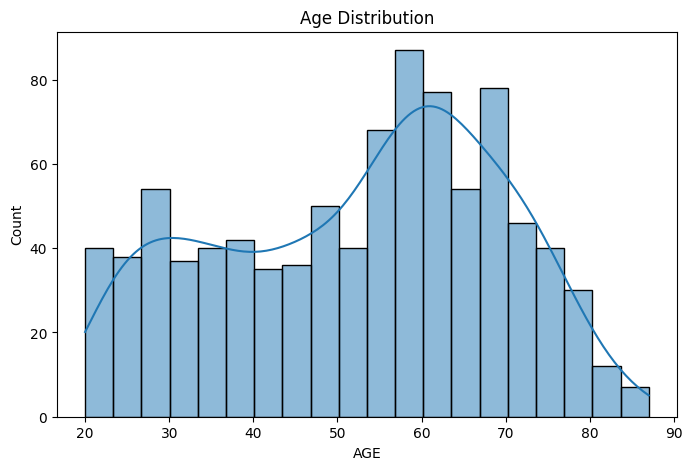

In [97]:
# Visual Inspection - Numeric Features
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


#### Age Distribution

Here, the age distribution is analysed with the use of a histogram.

- Individuals around the ages of 60 and 70 seem to be represented nearly twice as often as most younger age groups, with a sharp falloff in population after the age of 70, which is a realistic expectation when considering the average life span.

---

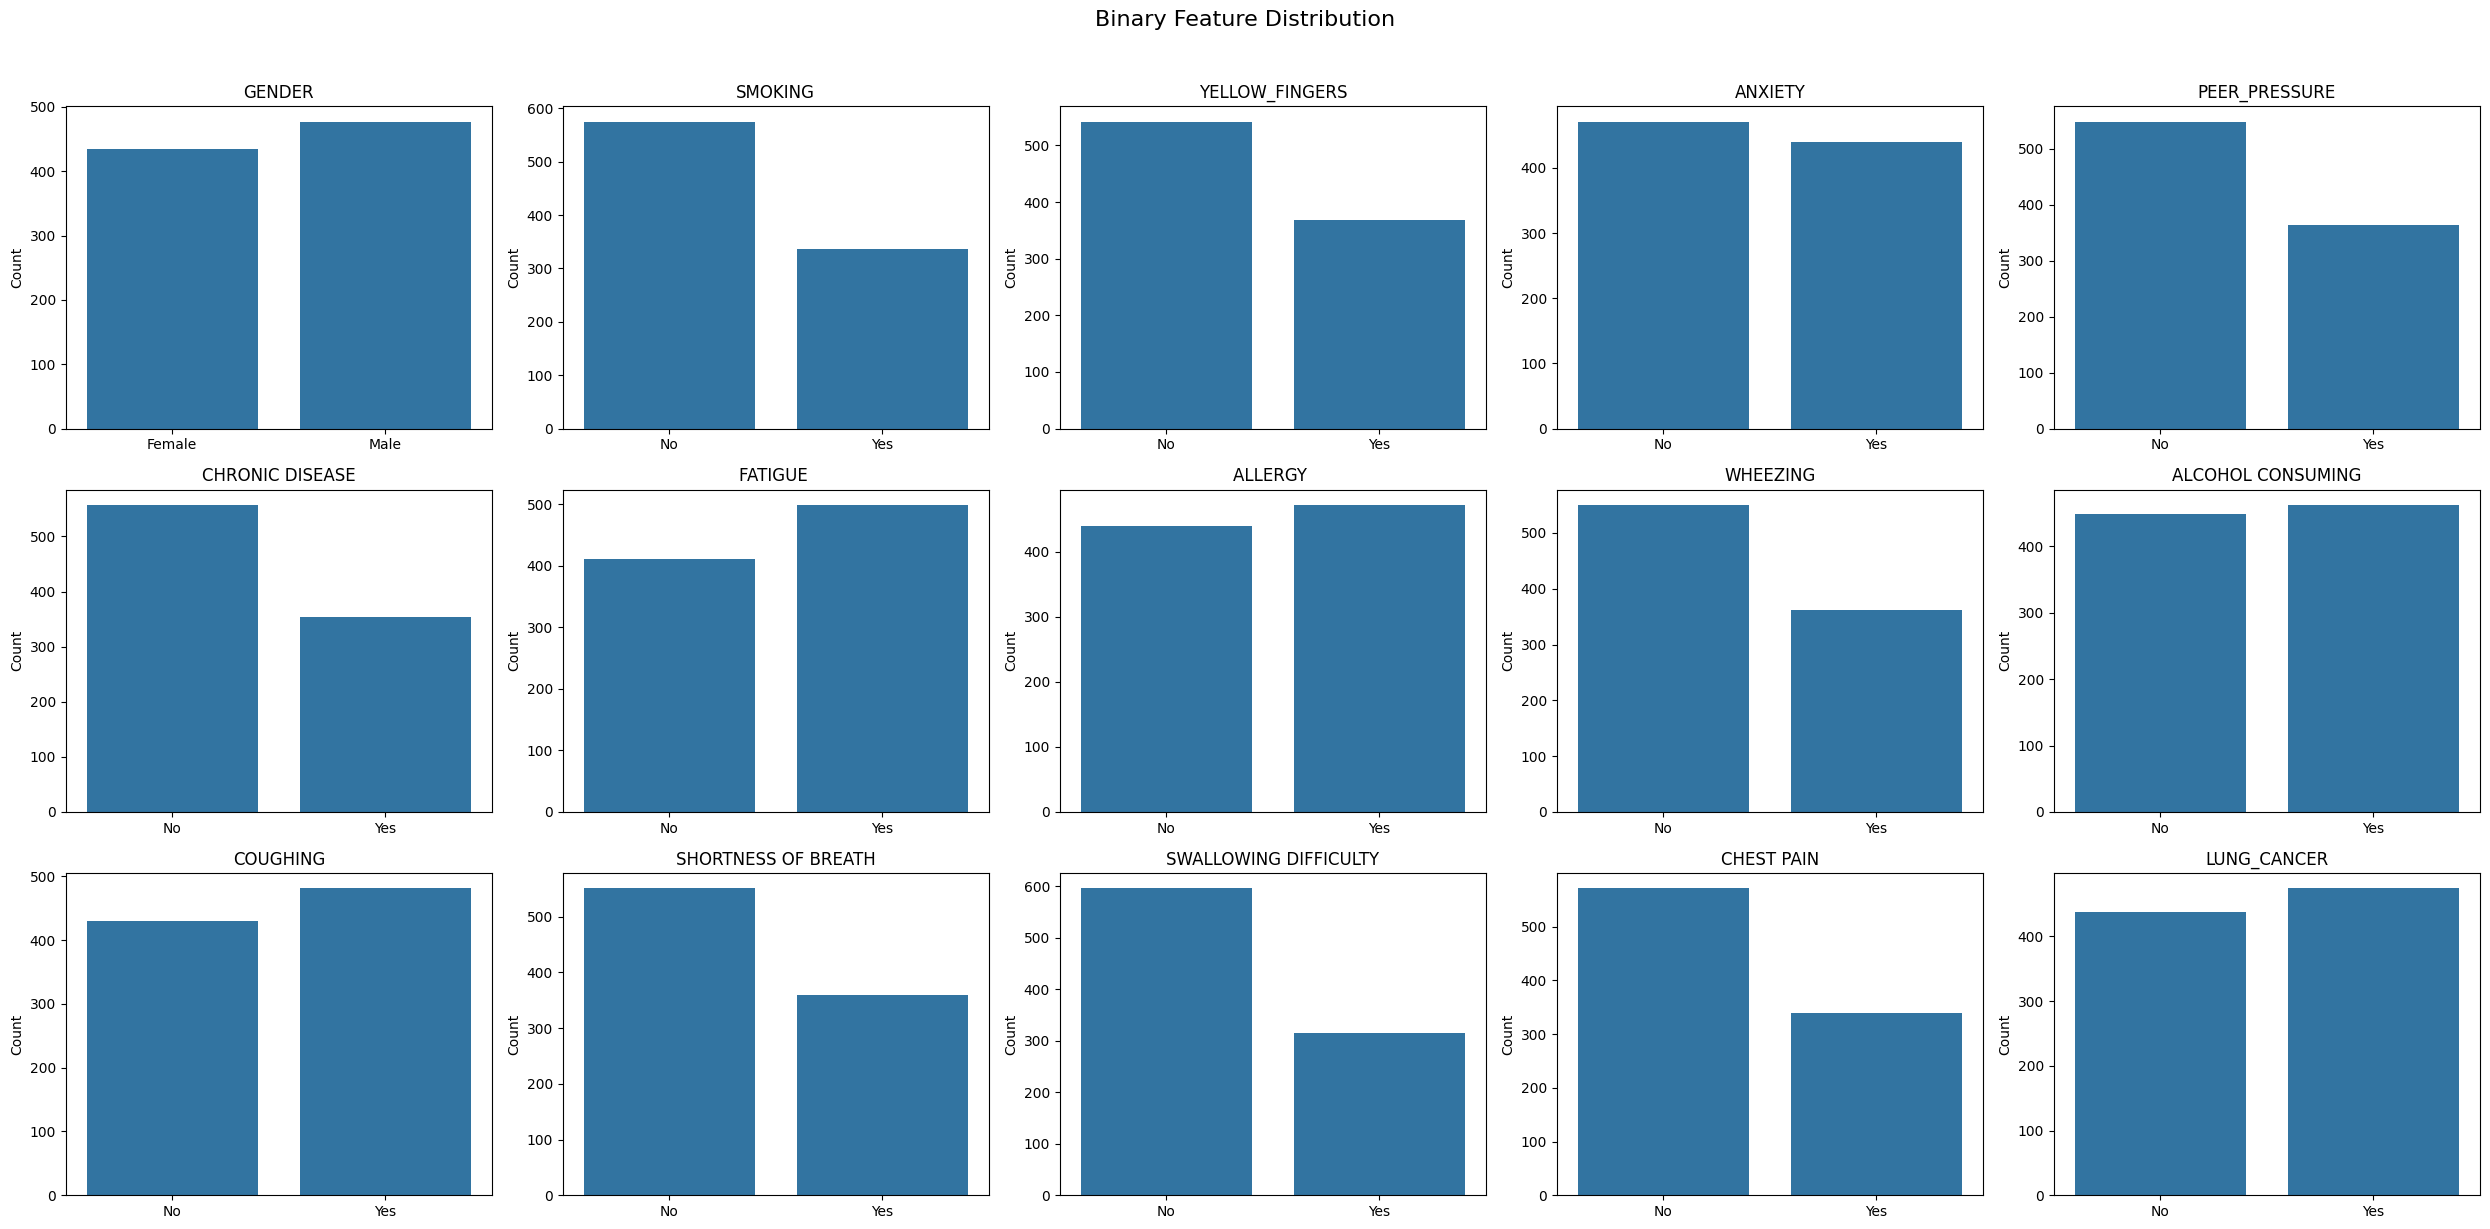

In [98]:
import math

# Visual Inspection - Categorical/Binary Features 
categorical_cols = [col for col in df.columns if col != 'AGE']

n_cols = 5
n_rows = math.ceil(len(categorical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
plt.suptitle('Binary Feature Distribution', fontsize=16, y=1.02)

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    ax = sns.countplot(x=col, data=df)
    plt.title(f'{col}')
    plt.xlabel('')
    plt.ylabel('Count')
    
# Fixing labels
    if col == 'GENDER':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Female', 'Male'])
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


#### Categorical Feature Balance

The balance of the categorical features is analysed here, it is important that all categories maintain some level of balance so that no group is over or under-represented causing a biased outcome.

- We can see that most features contain a fairly balanced number of individuals in both categories, with others only slightly imbalanced, a realistic expectation given the number of symptoms being reported.

- Symptoms that relate to smoking show a similar balance, which makes perfect sense, since those that smoke are more likely to experience those symptoms, over those who do not. This is also potentially an early indicator of multicollinearity present in the dataset, having to do with certain symptoms being related, for example, it is logical to assume that people who have a wheezing condition experience shortness of breath and chest pain.

---


--- Lung Cancer Class Balance ---
LUNG_CANCER
1    474
0    437
Name: count, dtype: int64


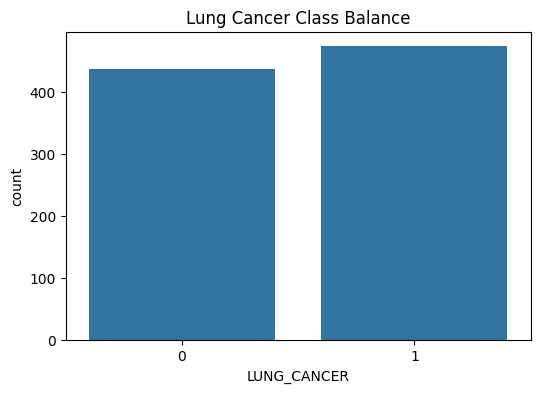

In [99]:
# Class Balance Check
print("\n--- Lung Cancer Class Balance ---")
print(df['LUNG_CANCER'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Lung Cancer Class Balance')
plt.show()


#### Target Class Balance

Here a closer look is taken at the `LUNG_CANCER` variable - the target variable of this dataset.

- The two classes seem to be almost evenly balanced, which is a good sign, and means that class imbalance will not play a role in affecting model evaluation. If the classes were highly imbalanced, say 80-20, then the model could get away with 80% accuracy by repeatedly predicting just one of the classes, making the metric less meaningful.

---

### **b. Feature Selection**

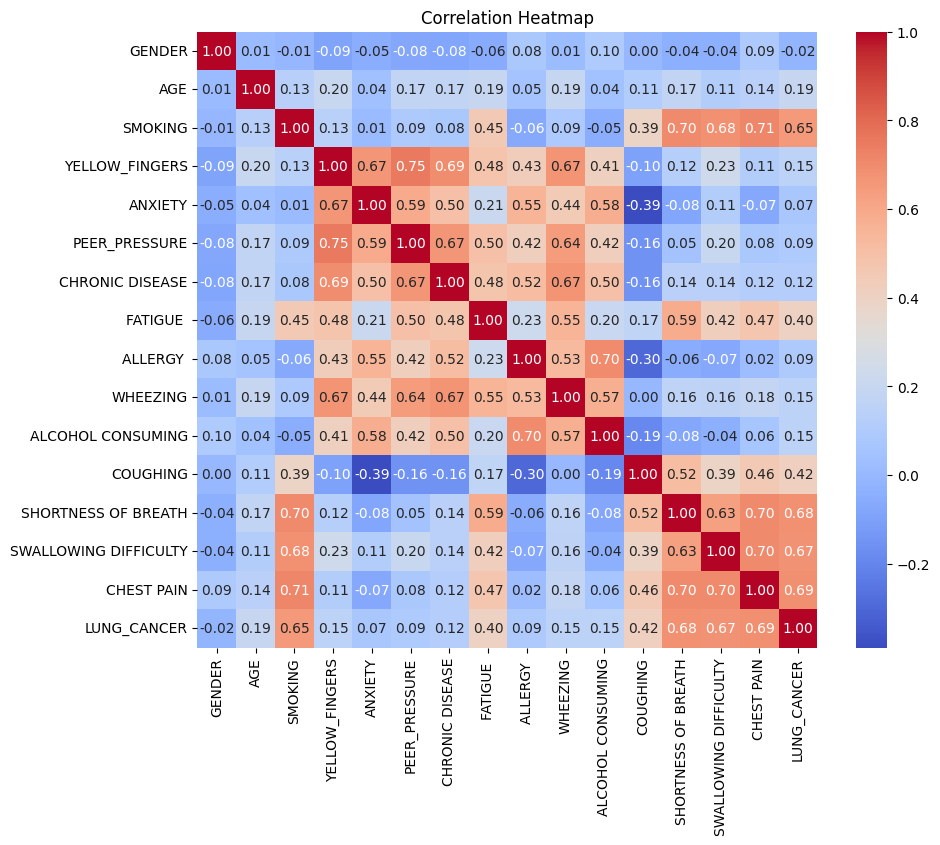

Feature correlations with LUNG_CANCER:
 LUNG_CANCER              1.000000
CHEST PAIN               0.686408
SHORTNESS OF BREATH      0.681736
SWALLOWING DIFFICULTY    0.674947
SMOKING                  0.647461
COUGHING                 0.416945
FATIGUE                  0.403345
AGE                      0.192490
WHEEZING                 0.153492
YELLOW_FINGERS           0.152208
ALCOHOL CONSUMING        0.152141
CHRONIC DISEASE          0.120858
PEER_PRESSURE            0.094823
ALLERGY                  0.089770
ANXIETY                  0.070636
GENDER                  -0.018418
Name: LUNG_CANCER, dtype: float64


In [100]:
# Correlation / Association Checks
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Check feature correlations with target
correlations = df.corr()["LUNG_CANCER"].sort_values(ascending=False)
print("Feature correlations with LUNG_CANCER:\n", correlations)

#### Summary of Feature Correlations with Lung Cancer

The analysis of feature correlations with lung cancer revealed several important patterns.

- Strong associations were observed between lung cancer and clinical symptoms such as chest pain, shortness of breath, swallowing difficulty, and smoking. These features stand out as key predictors and are expected to significantly influence the accuracy of any predictive model.  

- Moderate relationships were found for features like coughing and fatigue, indicating they may provide additional predictive support but are less central compared to the primary symptoms.  

- Weaker and minimal associations were observed for features such as age, wheezing, yellow fingers, alcohol consumption, chronic disease, peer pressure, allergy, and anxiety. While these variables might still have some effect, their direct relationship with lung cancer is limited.  

- Gender showed no meaningful correlation, suggesting it does not play a significant role in distinguishing lung cancer cases within this dataset.

A model that prioritises variables with stronger correlations is more likely to perform better, and thus, feature selection steps will be applied to include such variables.

---

In [101]:
import statsmodels.api as sm

# Prepare Data for Logistic Regression
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Add constant for intercept term
X = sm.add_constant(X)

# Set significance level
SL = 0.05

# Backward Elimination Loop Function
def backward_elimination(X, y, sl=SL):
    features = list(X.columns)
    while True:
        model = sm.Logit(y, X[features]).fit(disp=0)
        p_values = model.pvalues.drop('const')
        max_pval = p_values.max()
        if max_pval > sl:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Removed '{excluded_feature}' with p-value {max_pval:.4f}")
        else:
            break
    print("Final selected features:", features)
    return features, model

selected_features, final_model = backward_elimination(X, y)

print(final_model.summary())


Removed 'PEER_PRESSURE' with p-value 0.8255
Removed 'YELLOW_FINGERS' with p-value 0.4179
Removed 'CHRONIC DISEASE' with p-value 0.5090
Removed 'FATIGUE ' with p-value 0.2774
Removed 'AGE' with p-value 0.1145
Removed 'GENDER' with p-value 0.0766
Final selected features: ['const', 'SMOKING', 'ANXIETY', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  911
Model:                          Logit   Df Residuals:                      901
Method:                           MLE   Df Model:                            9
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.6834
Time:                        18:00:55   Log-Likelihood:                -199.71
converged:                       True   LL-Null:                       -630.71
Covariance Type:          

#### Feature Selection Summary

- Logit regression was used to iteratively identify features with p-values > 0.05 and remove them, resulting in the removal of features: `PEER_PRESSURE`, `YELLOW_FINGERS`, `CHRONIC DISEASE`, `FATIGUE`, `AGE`, `GENDER`

- Final Logit regression results show no features with p-values > 0.05

---

### c. Model Training

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,  roc_curve, confusion_matrix

# Select final features
selected_features = [
    'SMOKING', 'ANXIETY', 'ALLERGY ', 'WHEEZING', 
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

X = df[selected_features]
y = df['LUNG_CANCER']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### Model Training Summary

- A logistic regression model was trained to predict lung cancer using nine key features, including smoking status, anxiety, allergy, wheezing, alcohol consumption, coughing, shortness of breath, swallowing difficulty, and chest pain. These features were chosen to be part of the model based on the results from the backward elimination step taken during feature selection.

- The dataset was split into a training set (70%) and a test set (30%) to ensure reliable model evaluation. The logistic regression model was configured with a high iteration limit (max_iter = 1000) to ensure convergence during fitting.

- This setup provides a straightforward yet interpretable approach to classify lung cancer presence based on the most statistically significant predictors identified earlier through backward elimination.

---

## 5. Model Evaluation

### a. Interpretation and Evaluation of Trained Model

In [103]:
# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.9343
Precision: 0.9771
Recall: 0.8951
F1-score: 0.9343
ROC AUC: 0.9850


#### Interpretation of Evaluation Metrics

Several key metrics were used to evaluate the performance of the logistic regression model.

- Accuracy (93.4%): This indicates that the model correctly predicts lung cancer presence or absence in most cases overall. It reflects the proportion of total correct predictions.  

- Precision (97.7%): The model is highly precise, meaning when it predicts a positive lung cancer case, it is almost always correct.

- Recall (89.5%): The model successfully captures most of the true positive cases, ensuring that the majority of actual lung cancer cases are correctly identified. 

- F1-Score (93.4%): This 'harmonic' mean of precision and recall shows the model balances both well, offering strong overall predictive reliability.  

- ROC AUC (98.5%): Will be further discussed in the next section.

These metrics suggest the model is highly effective for lung cancer classification, with both strong precision and sensitivity, making it suitable for applications where both accuracy and patient safety matter.

---

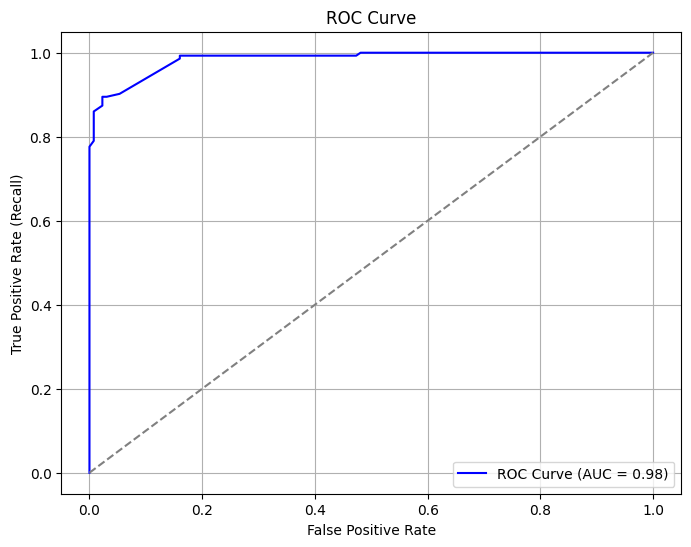

In [104]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


#### Interpretation of ROC Curve plot

The ROC curve for the logistic regression model shows excellent performance, with an AUC score of 0.98. This indicates the model has a very strong ability to distinguish between patients with lung cancer and those without. A score close to 1.0 suggests that across all decision thresholds, the model consistently ranks positive cases higher than negative ones. 

In practical terms, this means the model is highly effective at separating high-risk patients from low-risk ones, supporting reliable classification even when adjusting the sensitivity or specificity balance.

---

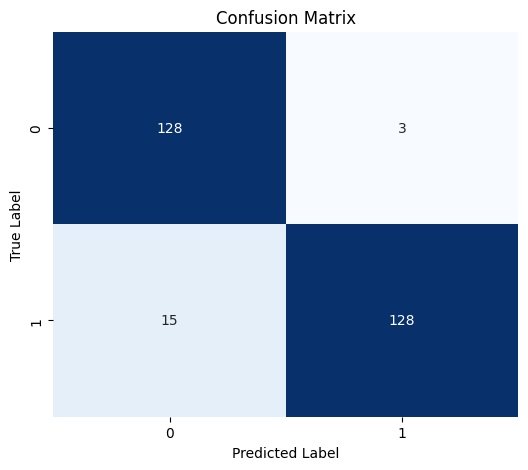

In [105]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Interpretation of Confustion Matrix

The model is very good at identifying non-cancer cases (very few false alarms).

It’s also strong at detecting cancer, though it misses some cases (15 false negatives), which is important in a medical context because missing positive cases can have serious consequences.

Overall, the confusion matrix reflects a well-performing classifier with high accuracy, precision, and recall.

---

### b. Consideration for Model Retraining

Based on the current evaluation metrics, retraining the logistic regression model is not considered necessary at this stage. The model achieves high performance across key indicators, including an accuracy of over 93%, precision near 98%, recall close to 90%, an F1-score matching the overall accuracy, and an excellent ROC AUC score of 0.98.

The confusion matrix further supports this, showing minimal false positives (only 3 cases) and a strong ability to correctly identify both positive (cancer) and negative (non-cancer) cases. While there are some false negatives (15 cases), the overall balance between precision and recall indicates that the model maintains reliable sensitivity and specificity.

Given these strong outcomes, the current model generalises well to unseen data, and no immediate performance concerns justify retraining. Retraining may only become necessary in the future if additional data is collected, the underlying data patterns change, or the business context shifts, requiring the model to adapt to new conditions.

---

<p align="center"><strong>END</strong></p>